Check Python version

In [1]:
!python --version

Python 3.9.0


Import libraries

In [2]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [3]:
# Through online GitHub
file_name = 'https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv'

In [4]:
train_df = pd.read_csv(file_name)

In [5]:
train_df.shape

(144, 2)

In [6]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [7]:
train_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
train_df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Define the required time and target columns

In [9]:
time_col = train_df.columns[0]
target_col = train_df.columns[-1]
train_df[time_col] = train_df[time_col].astype(str)

Change target column to float

In [10]:
train_df[target_col] = train_df[target_col].astype(float)

In [11]:
train_df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Plot graph

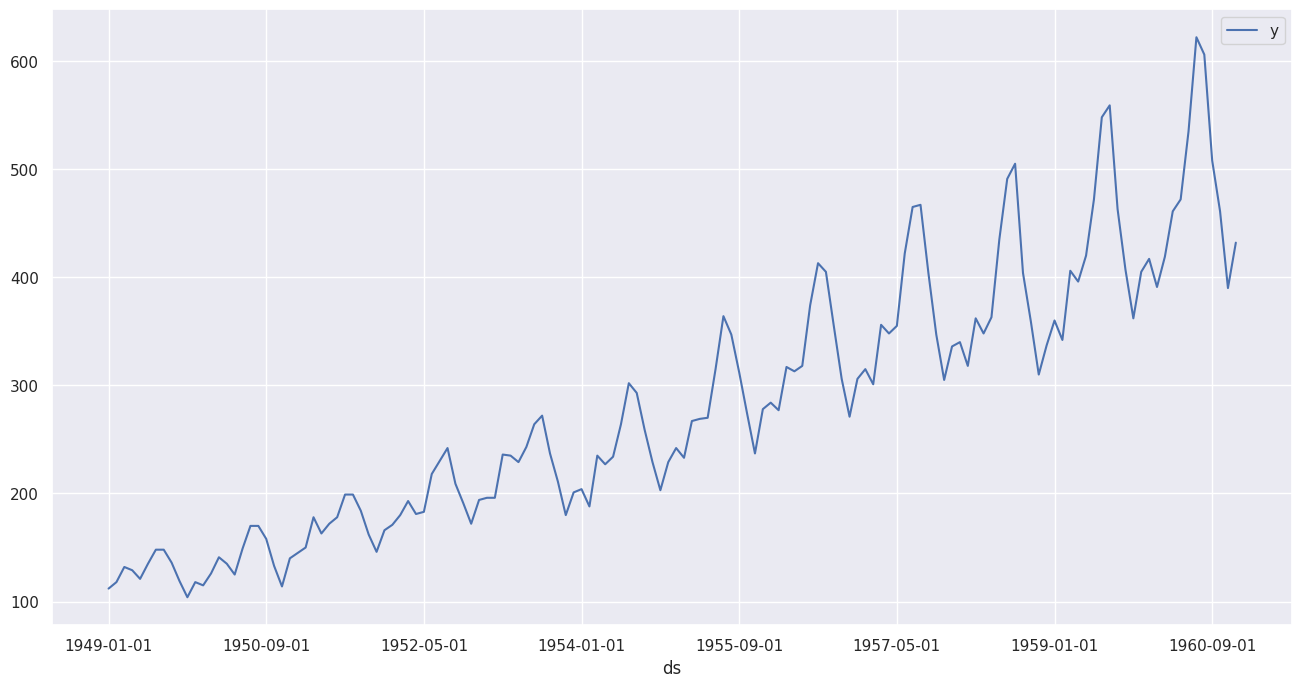

In [12]:
figsize = (16, 8)
train_df.set_index(time_col).plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [13]:
train_data = []

In [14]:
for value in train_df.values:
    train_data.append(list(value))

In [15]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Define Model Request (optional)

In [16]:
# Default model request
# model_request = {
#     'type': 'meta_wa',
#     'scorers': ['smape', 'mase'],
#     'params': {
#         'preprocessors': [
#             {'type': 'dartsimputer'},
#             {'type': 'minmaxscaler'},
#         ],
#         'base_models': [
#             {'type': 'darts_naive'},
#             # {'type': 'darts_seasonalnaive'},
#             # {'type': 'darts_autotheta'},
#             # {'type': 'darts_autoarima'},
#             # {'type': 'darts_autoets'},
#         ],
#     },
# }

# # Onboard NeuralProphet customized model request
# np_external_model_request = {
#     'params': {
#       'changepoints_range': 0.2,
#       'epochs': 2,
#       'growth': 'off'
#     },
#     'metrics': [],
#     'type': 'neuralprophet',
# }
# # np_external_model_request = None

# user_value = 0.9
# output_type = 'data'  # 'data', 'estimate'
# mauq_external_params = {
#     'data': train_df.values.tolist(),
#     'problem_type': 'regression',
#     'confidence_level': user_value,
#     'output_type': output_type

# }

ds_external_model_request = {
    'type': 'meta_wa',  # 'meta_naive', 'meta_wa'
    'scorers': ['mase', 'smape'],
    'params': {
        'preprocessors': [
            # {'type': 'dartsimputer'},
            # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            # {'type': 'darts_rnn',
            #  'params': {
            #      'model': 'LSTM',
            #      'hidden_dim': 10,
            #      'n_rnn_layers': 3
            # }},
            # {'type': 'darts_blockrnn'},
            # {'type': 'darts_nlinear'},
            # {'type': 'darts_dlinear'},
            # {'type': 'darts_tcn',
            #  'params': {
            #      'output_chunk_length': 24,
            #      'input_chunk_length': 48,                 
            #      'n_epochs': 100,
            # }},
            {'type': 'darts_tsmixer'},
            # {'type': 'darts_tide'},
        ],
    },
}


# # Customized model request
model_request = {
    'type': 'meta_wa',  # 'meta_naive', 'meta_wa'
    'scorers': ['mase', 'smape'],
    'params': {
        'preprocessors': [
            {'type': 'dartsimputer'},
            {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            # {'type': 'darts_naive'},
            # {'type': 'darts_seasonalnaive'},
            # {'type': 'darts_autotheta'},
            # {'type': 'stats_autotheta'},
            # {'type': 'darts_autoets'},
            # {'type': 'stats_autoets'},
            # {'type': 'darts_autoarima'},
            # {'type': 'stats_autoarima'},
            # {'type': 'darts_autoces'},
            # {'type': 'darts_kalman'},
            # {'type': 'darts_catboost'},            
            # # {'type': 'darts_tbats'},
            # # {'type': 'darts_linearregression'},
            # {'type': 'darts_lightgbm',
            #  'params': {
            #      'lags': 12,
            #      'output_chunk_length': 6,
            #      'verbose': -1
            # }}
            # {'type': 'neuralprophet',
            #  'external_params': np_external_model_request
            # }  # Onboard NeuralProphet external service
            {'type': 'deepsybil',
             'external_params': ds_external_model_request
            }  # Deep SYBIL external service
        ],
    },
}

This is for JSON model_request

In [17]:
# file_path = 'model_request.json'
# # For writing the model request to a json file
# with open(file_path, 'r') as file:
#     model_request = json.load(file)

This is for YAML model_request

In [18]:
# file_path = 'model_request.yaml'
# # For reading the model request from a yaml file
# with open(file_path, 'r') as file:
#     model_request = yaml.safe_load(file)

Train API JSON Payload

In [19]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

In [20]:
api_json['model']

{'type': 'meta_wa',
 'scorers': ['mase', 'smape'],
 'params': {'preprocessors': [{'type': 'dartsimputer'},
   {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
   {'type': 'minmaxscaler'}],
  'base_models': [{'type': 'deepsybil',
    'external_params': {'type': 'meta_wa',
     'scorers': ['mase', 'smape'],
     'params': {'preprocessors': [{'type': 'minmaxscaler'}],
      'base_models': [{'type': 'darts_tsmixer'}]}}}]}}

Build URL

In [21]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [22]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [23]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [24]:
# %%time
# print("Hello")
response = requests.post(url, json=api_json)
# print(response)
# print()

In [25]:
train_json_out = response.json()  # dict output
train_json_out
# response.json()

{'model': 'AgEDCOgvEwAAABAA+C8TAIAElVcRAAAAAAAAjA9tb2RlbHMucGlwZWxpbmWUjAhQaXBlbGluZZSTlCmBlH2UKIwMdHJhbnNmb3JtZXJzlF2UKIwTbW9kZWxzLnByZXByb2Nlc3NvcpSMDERhcnRzSW1wdXRlcpSTlCmBlH2UKIwEZmlsbJSMBGF1dG+UjAlmaWxsX21hc2uUjBFwYW5kYXMuY29yZS5mcmFtZZSMCURhdGFGcmFtZZSTlCmBlH2UKIwEX21ncpSMHnBhbmRhcy5jb3JlLmludGVybmFscy5tYW5hZ2Vyc5SMDEJsb2NrTWFuYWdlcpSTlCldlCiMGHBhbmRhcy5jb3JlLmluZGV4ZXMuYmFzZZSMCl9uZXdfSW5kZXiUk5SMG3BhbmRhcy5jb3JlLmluZGV4ZXMubnVtZXJpY5SMCkludDY0SW5kZXiUk5R9lCiMBGRhdGGUjBVudW1weS5jb3JlLm11bHRpYXJyYXmUjAxfcmVjb25zdHJ1Y3SUk5SMBW51bXB5lIwHbmRhcnJheZSTlEsAhZRDAWKUh5RSlChLAUsAhZRoJIwFZHR5cGWUk5SMAmk4lImIh5RSlChLA4wBPJROTk5K/////0r/////SwB0lGKJQwCUdJRijARuYW1llE51hpRSlIwdcGFuZGFzLmNvcmUuaW5kZXhlcy5kYXRldGltZXOUjBJfbmV3X0RhdGV0aW1lSW5kZXiUk5RoOIwNRGF0ZXRpbWVJbmRleJSTlH2UKGggjBNwYW5kYXMuX2xpYnMuYXJyYXlzlIwcX19weXhfdW5waWNrbGVfTkRBcnJheUJhY2tlZJSTlIwccGFuZGFzLmNvcmUuYXJyYXlzLmRhdGV0aW1lc5SMDURhdGV0aW1lQXJyYXmUk5RKuFxVDU6HlFKUaC2MAk04lImIh5RSlChLBGgxTk5OSv////9K/////0sAfZQoQwJuc5RLAUsBSwF0l

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [26]:
dates = [
    '1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01', '1961-05-01', '1961-06-01',
    '1961-07-01', '1961-08-01', '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
    '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01', '1962-05-01', '1962-06-01',
    '1962-07-01', '1962-08-01', '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
]

Model from Train API

In [27]:
model = train_json_out['model']

Forecast API JSON Payload

In [28]:
api_json = {
    'model': model,
    'data': dates
}

Build URL (same as train except for the endpoint)

In [29]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [30]:
%%time
response = requests.post(url, json=api_json,verify=False)
print(response)
print()

/home/kevin/anaconda3/envs/sybil/lib/python3.9/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sybil-test.tempor.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<Response [200]>

CPU times: user 22.9 ms, sys: 2.31 ms, total: 25.3 ms
Wall time: 1.14 s


In [31]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['1961-01-01', 406.9696499352672],
  ['1961-02-01', 446.4840757956812],
  ['1961-03-01', 464.850980534539],
  ['1961-04-01', 455.585008938132],
  ['1961-05-01', 517.3130941777129],
  ['1961-06-01', 574.426557264047],
  ['1961-07-01', 656.4888261456124],
  ['1961-08-01', 652.7268671070235],
  ['1961-09-01', 588.9687484780142],
  ['1961-10-01', 490.84707422553],
  ['1961-11-01', 445.6436995773495],
  ['1961-12-01', 441.29075109909985],
  ['1962-01-01', 420.6401480038299],
  ['1962-02-01', 481.3177354371566],
  ['1962-03-01', 496.69763488960626],
  ['1962-04-01', 467.9154421337896],
  ['1962-05-01', 540.0900849507505],
  ['1962-06-01', 575.3670212166032],
  ['1962-07-01', 658.4425568236378],
  ['1962-08-01', 716.3953690055179],
  ['1962-09-01', 654.1825105502119],
  ['1962-10-01', 522.2693460668553],
  ['1962-11-01', 486.5884171157575],
  ['1962-12-01', 452.652083916138]]}

Combine forecast dates and output

In [32]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col],
)

In [33]:
forecast_df.shape

(24, 2)

In [34]:
forecast_df.columns

Index(['ds', 'y'], dtype='object')

In [35]:
forecast_df.head()

,ds,y
0,1961-01-01,406.969650
1,1961-02-01,446.484076
2,1961-03-01,464.850981
3,1961-04-01,455.585009
4,1961-05-01,517.313094


In [36]:
forecast_df.tail()

,ds,y
19,1962-08-01,716.395369
20,1962-09-01,654.182511
21,1962-10-01,522.269346
22,1962-11-01,486.588417
23,1962-12-01,452.652084


Plot train and forecast side-by-side

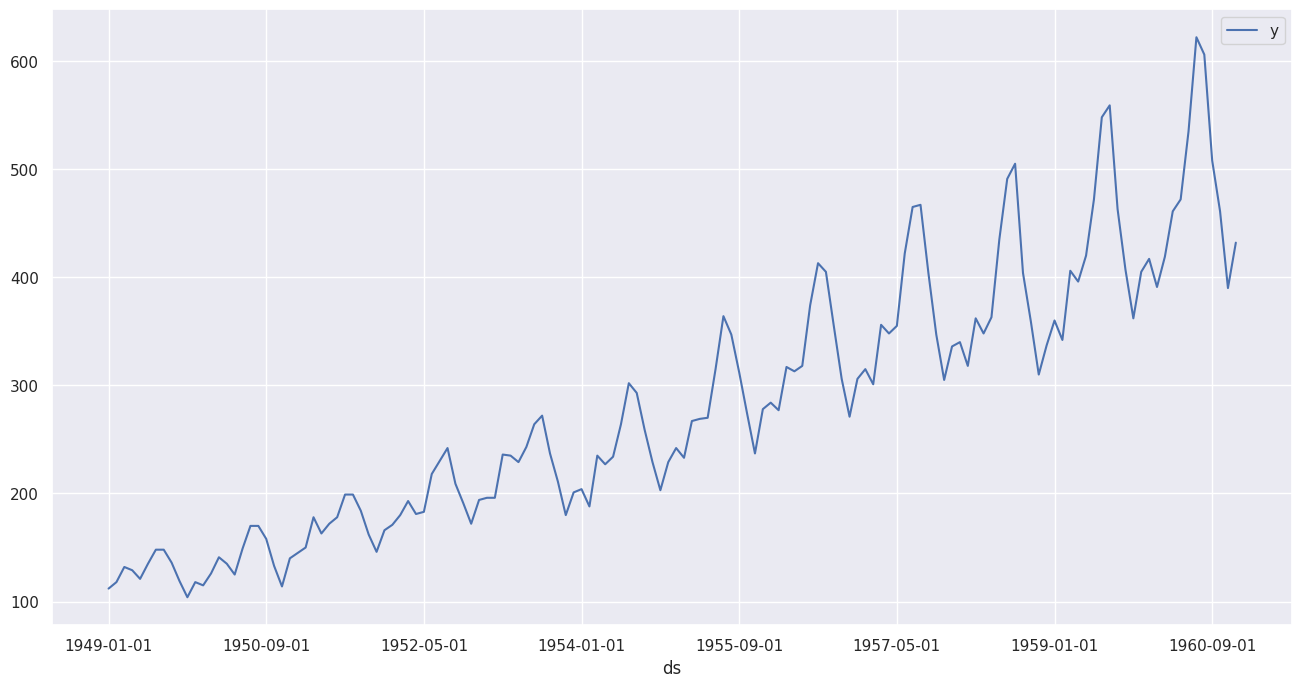

In [37]:
train_df['color'] = 'b'
train_df.set_index(time_col).plot(figsize=figsize, color=train_df['color']);

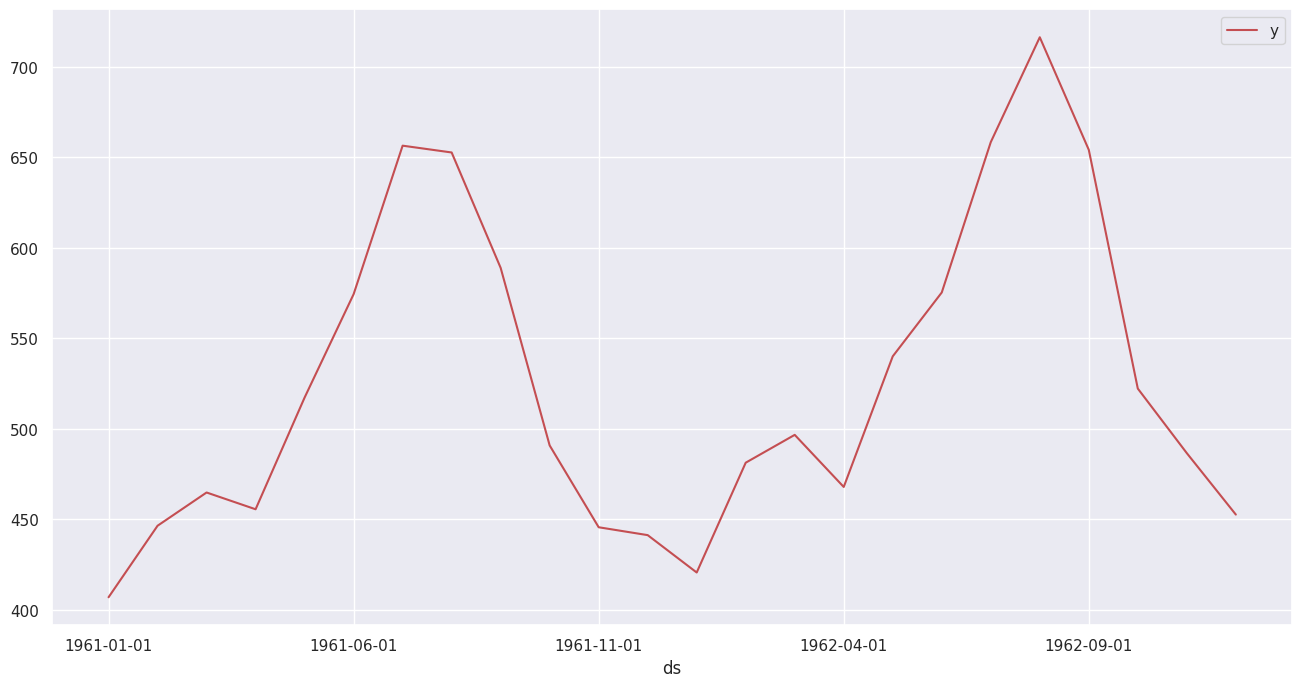

In [38]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and forecast sets

In [39]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [40]:
df.shape

(168, 3)

In [41]:
df.head()

,ds,y,color
0,1949-01-01,112.0,b
1,1949-02-01,118.0,b
2,1949-03-01,132.0,b
3,1949-04-01,129.0,b
4,1949-05-01,121.0,b


In [42]:
df.tail()

,ds,y,color
163,1962-08-01,716.395369,r
164,1962-09-01,654.182511,r
165,1962-10-01,522.269346,r
166,1962-11-01,486.588417,r
167,1962-12-01,452.652084,r


Plot combined train and forecast sets with the vertical black line as the cut-off

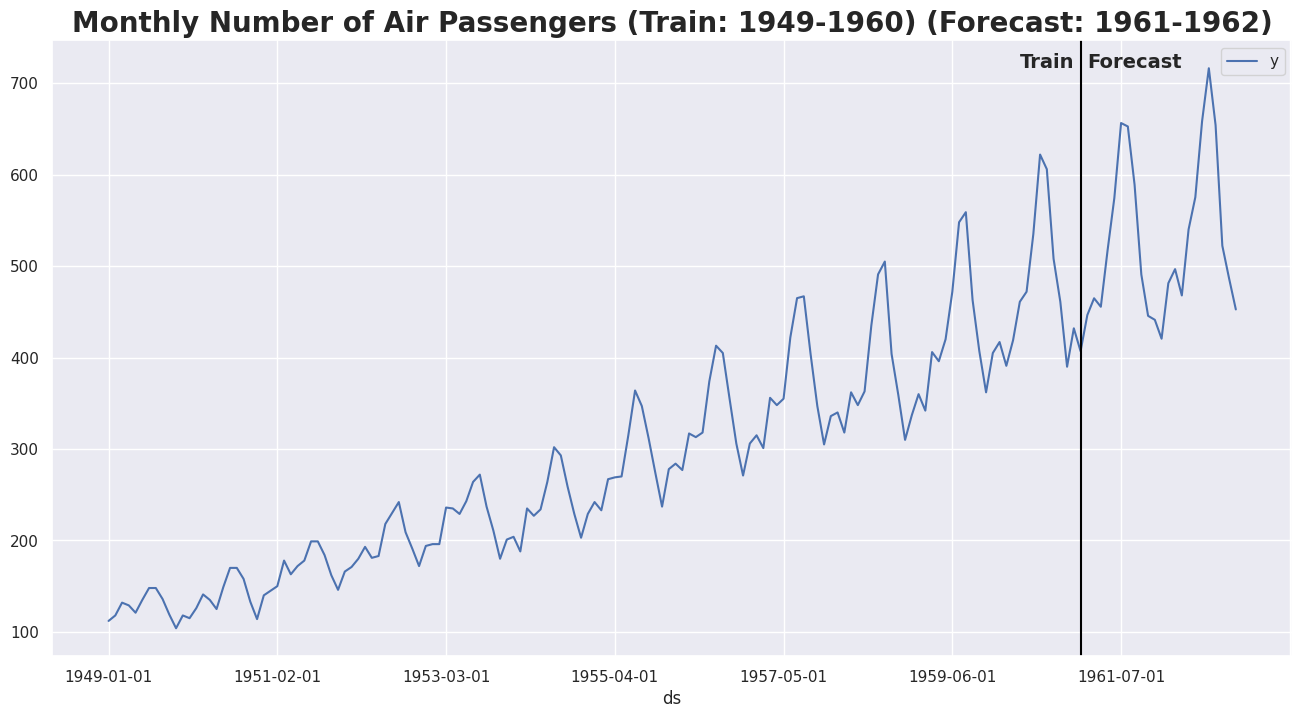

In [43]:
df.set_index(time_col).plot(figsize=figsize, color=df['color'])
plt.axvline(x=len(train_df), color='black', label='Train/Forecast set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Forecast', fontweight='bold', fontsize=14)
plt.title(label='Monthly Number of Air Passengers (Train: 1949-1960) (Forecast: 1961-1962)', fontweight='bold', fontsize=20)
plt.show();